## EXERCISE 1

<img src='https://drive.google.com/uc?id=1C2vyT2X19C_IekWf3rELuF4SumvJxo2b'>

1) Write a Python script that computes P(g|do(r)) seen during the lecture

2) What is the causal effect of the cloudy weather $c$ on the grass' wetness $g$? (i.e. math expression of $P(g | do(c))$

3) Between rain and sprinkler, which one has the stronger causal effect on the wetness, $P(g | do(r))$ or $P(g | do(s))$ ?

4) Compute the average causal effect (ACE) of the sprinkler on the wetness $g$.

1) Write a Python script that computes $P(g|do(r))$ seen during the lecture

Let's write down the probabilities

In [ ]:
import numpy as np

t, f = 0, 1

P_C = np.array([0.5, 0.5])

P_R_C = np.array([[0.8, 0.1], [0.2, 0.9]])

P_S_C = np.array([[0.1, 0.5], [0.9, 0.5]])

P_W_SR = np.array([[[0.95, 0.90],[0.90, 0.10]],[[0.05, 0.10], [0.10, 0.90]]])

$
\begin{align*}
P(g | do(r)) &= \sum_{z \in C} P(g | r, z) P(z) \\
&= P(g | r, c) P(c) + P(g | r, \neg c) P(\neg c)
\end{align*}
$

The probability distribution ${\bf P}(C) = \langle P(c), P(\neg c) \rangle$ is already given by the network. The conditional distribution ${\bf P}(G | r, c) = \langle P(g | r, c), P(\neg g | r, c)\rangle$ can be computed as follows:

$
\begin{align*}
{\bf P}(G | r, c) = \dfrac{{\bf P}(G, r, c)}{P(r, c)} = \alpha {\bf P}(G, r, c) &= \alpha \sum_s {\bf P}(G, r, c, s) \\
&= \alpha \sum_s P(c) P(r|c) P(s|c) {\bf P}(G | r, s) \\
&= \alpha P(c) P(r|c) \sum_s  P(s|c) {\bf P}(G | r, s) \\
&= \alpha' \sum_s  P(s|c) {\bf P}(G | r, s) \\
&= \alpha' \big[ P(s|c) {\bf P}(G | r, s) + P(\neg s|c) {\bf P}(G | r, \neg s) \big]
\end{align*}
$

where in the last steps we moved the product $P(c) P(r|c)$ within the normalisation factor $\alpha'$.

Substituting the values from the network's CPTs, we get the following:

$
{\bf P}(G | r, c) = \alpha' \big[ 0.1 \times \langle 0.95, 0.05 \rangle + 0.9 \times \langle 0.90, 0.10 \rangle \big] = \langle 0.905, 0.095 \rangle
$

If we do the same for the condition $\neg c$, we obtain the following distribution:

$
{\bf P}(G | r, \neg c) = \alpha' \big[ 0.5 \times \langle 0.95, 0.05 \rangle + 0.5 \times \langle 0.90, 0.10 \rangle \big] = \langle 0.925, 0.075 \rangle
$

Finally, we use the calculated values, $P(g | r, c) = 0.905$ and $P(g | r, \neg c) = 0.925$, in the previous adjustment formula and obtain the following:

$
P(g | do(r)) = 0.905 \times 0.5 + 0.925 \times 0.5 = 0.915
$

which is our causal effect of the intervention $R = true$ on the wetness $G = true$.




$
\begin{align*}
{\bf P}(G | r, c)
&= \alpha' \big[ P(s|c) {\bf P}(G | r, s) + P(\neg s|c) {\bf P}(G | r, \neg s) \big]
\end{align*}
$

Let's call it $p_1$

In [ ]:
p1 = P_S_C[t,t] * P_W_SR[:,t,t] + P_S_C[f,t] * P_W_SR[:,t,f]
print(p1)

[0.905 0.095]


$
\begin{align*}
{\bf P}(G | r, \neg c)
&= \alpha' \big[ P(s|\neg c) {\bf P}(G | r, s) + P(\neg s|\neg c) {\bf P}(G | r, \neg s) \big]
\end{align*}
$

Let's call it $p_2$

In [ ]:
p2 = P_S_C[t,f] * P_W_SR[:,t,t] + P_S_C[f,f] * P_W_SR[:,t,f]
print(p2)

[0.925 0.075]


$
\begin{align*}
P(g | do(r)) &= \sum_{z \in C} P(g | r, z) P(z) \\
&= P(g | r, c) P(c) + P(g | r, \neg c) P(\neg c)
\end{align*}
$

Now that we have those probabilities, we can compute the final result.

In [ ]:
pgdor = p1[0] * P_C[t] + p2[0] * P_C[f]
print(pgdor)

0.915


2) What is the causal effect of the cloudy weather $c$ on the grass' wetness $g$? (i.e. math expression of $P(g | do(c))$


As $c$ has no parents,

$
\begin{align*}
P(G|do(c)) = P(G|c))
&= \alpha \sum_{s,r}P(G,c,r,s) \\
&= \alpha \sum_{s,r}P(g|s,r)P(s|c)P(r|c)P(c)\\
&= \alpha P(c) \sum_sP(s|c) \sum_rP(G|s,r)P(r|c)
\end{align*}
$

To make it easier: \\
$
\begin{align*}
\phi_r = \sum_rP(G|s,r)P(r|c)
\end{align*}
$
and \\
$
\begin{align*}
\phi_z = \sum_sP(s|c) \phi_r
\end{align*}
$

In [ ]:
Phi_r = P_W_SR[:, :, t] * P_R_C[t, t] + P_W_SR[:, :, f] * P_R_C[f, t]
print(Phi_r)

[[0.94 0.74]
 [0.06 0.26]]


In [ ]:
Phi_s = P_S_C[t, t] * Phi_r[:, t] + P_S_C[f, t] * Phi_r[:, f]
print(Phi_s)

[0.76 0.24]


Or (to verify the calculations)

In [ ]:
p = P_C[t] *(P_S_C[t, t] *(P_W_SR[:, t, t] * P_R_C[t, t] + P_W_SR[:, t, f] * P_R_C[f, t])+ P_S_C[f, t] *(P_W_SR[:, f, t] * P_R_C[t, t] + P_W_SR[:, f, f] * P_R_C[f, t]))
alpha = 1/(p[0]+p[1])
print(p*alpha)

[0.76 0.24]


3) Between rain and sprinkler, which one has the stronger causal effect on the wetness, $P(g | do(r))$ or $P(g | do(s))$ ?

In [41]:
!pip install pyAgrum
from IPython.display import display, Math, Latex

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.causal as csl
import pyAgrum.causal.notebook as cslnb

Let's built the BN

In [42]:
m = gum.fastBN("Cloudy{Clouds|Clear}->Rain{Rainy|noRainy}->WetGrass{Wet|Dry}<-Sprinkler{On|Off}<-Cloudy")

m.cpt("Cloudy") [:] = [0.5, 0.5]

m.cpt("Rain")[:] = [[0.8, 0.2], #cloudy
                    [0.1, 0.9]] #no cloudy

m.cpt("Sprinkler")[:] = [[0.1, 0.9],     #cloudy
                         [0.5, 0.5]]     #no cloudy

m.cpt("WetGrass") [{"Sprinkler": "On", "Rain": "Rainy"}] = [0.95, 0.05]
m.cpt("WetGrass") [{"Sprinkler": "On", "Rain": "noRainy"}] = [0.90, 0.10]
m.cpt("WetGrass") [{"Sprinkler": "Off", "Rain": "Rainy"}] = [0.90, 0.10]
m.cpt("WetGrass") [{"Sprinkler": "Off", "Rain": "noRainy"}] = [0.10, 0.90]

gnb.flow.row(m, m.cpt("Cloudy"), m.cpt("Rain"), m.cpt("Sprinkler"), m.cpt("WetGrass"))

Let's create the causal model to compute $P(g|do(r))$

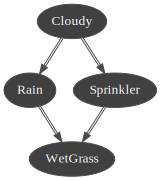

In [43]:
c = csl.CausalModel(m)
cslnb.showCausalModel(c)

In [45]:
cslnb.showCausalImpact(c, "WetGrass", doing = "Rain", values = {"Rain" : "Rainy"})

In [46]:
cslnb.showCausalImpact(c, "WetGrass", doing = "Sprinkler", values = {"Sprinkler" : "On"})

Sprinkler seems to have a stronger effect on wetness

4) Compute the average causal effect (ACE) of the sprinkler on the wetness $g$.

$ACE = P(g|do(S = On)) - P(g|do(S = Off))$

In [49]:
on = cslnb.showCausalImpact(c, "WetGrass", doing = "Sprinkler", values = {"Sprinkler" : "On"})
off = cslnb.showCausalImpact(c, "WetGrass", doing = "Sprinkler", values = {"Sprinkler" : "Off"})

NoneType

In [51]:
ACE = .9225 - .46
print(ACE)

0.46249999999999997
